## **Linear Regression**
Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

### **Simple Linear Regression**
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
- One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
- The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Author: Aditi Mohanty
#### Task: 1

- Import all the required libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

- Read the csv file into a pandas dataframe

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


- To analyse the relationship between the attributes, we use a 2D graph plot to visualise the data points. We can create the plot with the help of the following code

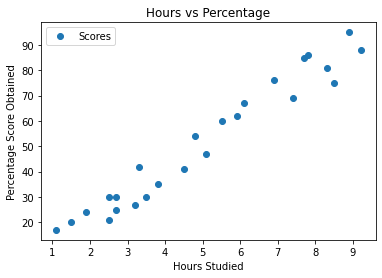

In [8]:
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied') #label for x-axis
plt.ylabel('Percentage Score Obtained') #label for y-axis
plt.show()

- The slope of the line is positive (small values of X correspond to small values of Y; large values of X correspond to large values of Y), so there is a positive co-relation (that is, a positive correlation) between X and Y and hence from this we can infer that there is a positive linear relationship between the two attributes.

### Preparing the data
In the next step, we will divide the dataset into input attributes and output labels in the following way

In [14]:
x = df.iloc[:, : -1].values #this will put all the attributes in an array except the last column into the x variable
y = df.iloc[:, 1].values #using this it will give us a series data which is a 1-d labelled array 

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In the above code, we split the dataset into training set and test set. The test set contains 20% of the data while the training set contains 80% of the data.

### **Training the Algorithm**
Now that we have split our data into training and testing sets, it is time to train our algorithm using the linear regression model of Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #fits the linear model just created 
print("Training complete.")

Training complete.


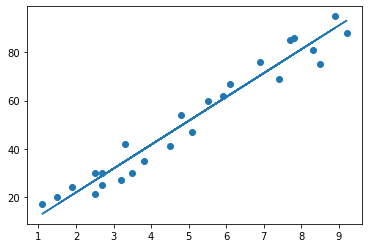

In [17]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error. Here "regressor.coef_" corresponds to 𝛽₁ and "regressor intercept_" corresponds to 𝛽₀.

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
